# Integrals on the grid 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [28]:
mesh = pv.read("./Wind-Cloud-MHD-Al/data.0000.vtk")

In [29]:
print(mesh)

RectilinearGrid (0x10e05c3d0)
  N Cells:	1769472
  N Points:	1815937
  X Bounds:	-6.000e+00, 6.000e+00
  Y Bounds:	-2.000e+00, 2.200e+01
  Z Bounds:	-6.000e+00, 6.000e+00
  Dimensions:	97, 193, 97
  N Arrays:	9



In [30]:
rho = pv.get_array(mesh, "rho", preference = 'cell')

tr1 = pv.get_array(mesh, "tr1", preference = 'cell')

In [31]:
rho3D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

tr13D = tr1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

print(rho3D.shape)

(96, 192, 96)


In [32]:
print((mesh.dimensions[2] - 1)//2)


48


In [33]:
rho2D = rho3D[((mesh.dimensions[2] - 1)//2),:,:]

In [34]:
print(rho2D.shape)

(192, 96)


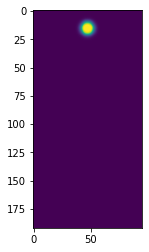

In [35]:
%matplotlib inline
plt.imshow(np.log10(rho2D))

In [47]:
x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1, dtype = float)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1, dtype = float)
z = np.linspace(mesh.bounds[4], mesh.bounds[5], mesh.dimensions[2] - 1, dtype = float)

In [48]:
print(x)

[-6.         -5.87368421 -5.74736842 -5.62105263 -5.49473684 -5.36842105
 -5.24210526 -5.11578947 -4.98947368 -4.86315789 -4.73684211 -4.61052632
 -4.48421053 -4.35789474 -4.23157895 -4.10526316 -3.97894737 -3.85263158
 -3.72631579 -3.6        -3.47368421 -3.34736842 -3.22105263 -3.09473684
 -2.96842105 -2.84210526 -2.71578947 -2.58947368 -2.46315789 -2.33684211
 -2.21052632 -2.08421053 -1.95789474 -1.83157895 -1.70526316 -1.57894737
 -1.45263158 -1.32631579 -1.2        -1.07368421 -0.94736842 -0.82105263
 -0.69473684 -0.56842105 -0.44210526 -0.31578947 -0.18947368 -0.06315789
  0.06315789  0.18947368  0.31578947  0.44210526  0.56842105  0.69473684
  0.82105263  0.94736842  1.07368421  1.2         1.32631579  1.45263158
  1.57894737  1.70526316  1.83157895  1.95789474  2.08421053  2.21052632
  2.33684211  2.46315789  2.58947368  2.71578947  2.84210526  2.96842105
  3.09473684  3.22105263  3.34736842  3.47368421  3.6         3.72631579
  3.85263158  3.97894737  4.10526316  4.23157895  4

In [49]:
print(y)

[-2.00000000e+00 -1.87434555e+00 -1.74869110e+00 -1.62303665e+00
 -1.49738220e+00 -1.37172775e+00 -1.24607330e+00 -1.12041885e+00
 -9.94764398e-01 -8.69109948e-01 -7.43455497e-01 -6.17801047e-01
 -4.92146597e-01 -3.66492147e-01 -2.40837696e-01 -1.15183246e-01
  1.04712042e-02  1.36125654e-01  2.61780105e-01  3.87434555e-01
  5.13089005e-01  6.38743455e-01  7.64397906e-01  8.90052356e-01
  1.01570681e+00  1.14136126e+00  1.26701571e+00  1.39267016e+00
  1.51832461e+00  1.64397906e+00  1.76963351e+00  1.89528796e+00
  2.02094241e+00  2.14659686e+00  2.27225131e+00  2.39790576e+00
  2.52356021e+00  2.64921466e+00  2.77486911e+00  2.90052356e+00
  3.02617801e+00  3.15183246e+00  3.27748691e+00  3.40314136e+00
  3.52879581e+00  3.65445026e+00  3.78010471e+00  3.90575916e+00
  4.03141361e+00  4.15706806e+00  4.28272251e+00  4.40837696e+00
  4.53403141e+00  4.65968586e+00  4.78534031e+00  4.91099476e+00
  5.03664921e+00  5.16230366e+00  5.28795812e+00  5.41361257e+00
  5.53926702e+00  5.66492

In [50]:
X, Y = np.meshgrid(x, y)

print(X.shape)

(192, 96)


In [51]:
print(x[2] - x[1], y[2] - y[1])

0.12631578947368372 0.12565445026178024


/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


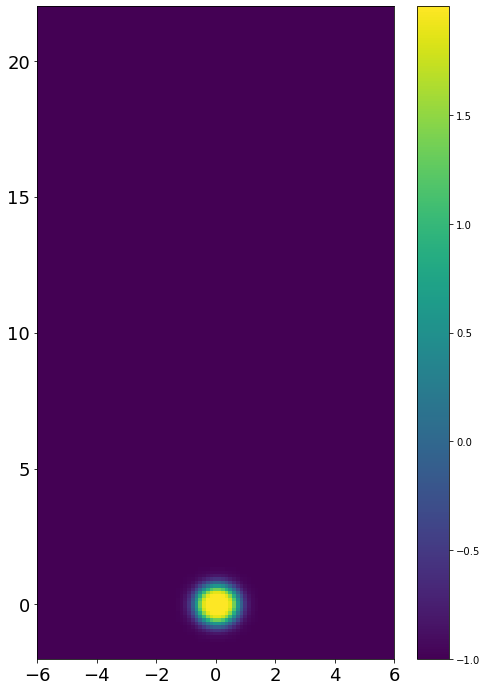

In [39]:
plt.figure(figsize = (8,12))

Z1 = plt.pcolor(X, Y, np.log10(rho2D))#, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)
#Z2 = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_velocity, cmap = 'Oranges')

CB1 = plt.colorbar(Z1)
#CB2 = plt.colorbar(Z2)

#CB1.set_label('Density', size=18)
#CB2.set_label('Velocity', size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [40]:
A = (np.sum(rho3D*tr13D,axis=2, dtype = float))

B = np.sum(np.sum(rho3D*tr13D,axis=2, dtype = float), axis = 0)
     
print(A.shape)
print(B.shape)
print(y.shape)

print(y)

(96, 192)
(192,)
(192,)
[-2.00000000e+00 -1.87434555e+00 -1.74869110e+00 -1.62303665e+00
 -1.49738220e+00 -1.37172775e+00 -1.24607330e+00 -1.12041885e+00
 -9.94764398e-01 -8.69109948e-01 -7.43455497e-01 -6.17801047e-01
 -4.92146597e-01 -3.66492147e-01 -2.40837696e-01 -1.15183246e-01
  1.04712042e-02  1.36125654e-01  2.61780105e-01  3.87434555e-01
  5.13089005e-01  6.38743455e-01  7.64397906e-01  8.90052356e-01
  1.01570681e+00  1.14136126e+00  1.26701571e+00  1.39267016e+00
  1.51832461e+00  1.64397906e+00  1.76963351e+00  1.89528796e+00
  2.02094241e+00  2.14659686e+00  2.27225131e+00  2.39790576e+00
  2.52356021e+00  2.64921466e+00  2.77486911e+00  2.90052356e+00
  3.02617801e+00  3.15183246e+00  3.27748691e+00  3.40314136e+00
  3.52879581e+00  3.65445026e+00  3.78010471e+00  3.90575916e+00
  4.03141361e+00  4.15706806e+00  4.28272251e+00  4.40837696e+00
  4.53403141e+00  4.65968586e+00  4.78534031e+00  4.91099476e+00
  5.03664921e+00  5.16230366e+00  5.28795812e+00  5.41361257e+00
 

In [41]:
#Centre of mass
cmx = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2, dtype = float),axis=1, dtype = float)*(x), dtype = float)/np.sum(rho3D*tr13D, dtype = float)
cmy = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2, dtype = float),axis=0, dtype = float)*(y), dtype = float)/np.sum(rho3D*tr13D, dtype = float)
cmz = np.sum(np.sum(np.sum(rho3D*tr13D,axis=1, dtype = float),axis=0, dtype = float)*(z), dtype = float)/np.sum(rho3D*tr13D, dtype = float) 

In [42]:
cmy


-0.052356020942408474